# Pymaceuticals Inc.
---

### Analysis

1) It is reasonable to deduce that the most effective drug regimens for the mice were Capomulin and Ramicane. These drug regimens showed noticeably lower mean and median tumor volumes than the mice that were treated with the other eight regimens. These two treatment regimens showed means that were more than 10 mm3 less than the next lowest treatment options. Also both of these regimens showed noticeably  lower windows of IQR than the two treatments they were put against('Infubinol', 'Ceftamin') in the box plot. Also both treatments featured the smallest values of variance compared to the other eight treatments by more than 15 points against the next lowest calculated variance. Additionally, both treatments feature the noticably lowest SEM against all other treatments. Thus, these treatments were not only the most effective but also likely the most reliable. 

2) The mouse f996 that was treated with capomulin had a nearly perfect negative linear regression when tumor volume was assessed against timepoint. It was close to following a steadily decreasing linear progression. The tumor volume certinaly went down at every time point and the decrease was close to linear. 

3) There is a fairly strong correlation between mouse weight and tumor volume. The correlation coefficient between these sets of data points is84. This is very close to .85 which is often recognized as being indicative of a strong correlation between data sets. 
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice.
len(mouse_merge["Mouse ID"].unique())

249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entries = mouse_merge[mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_entries['Mouse ID'].unique()
duplicate_entries
duplicate_mice

array(['g989'], dtype=object)

In [86]:
duplicate_mouse_ids = mouse_merge.loc[mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_entries = mouse_merge[mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_merge[mouse_merge['Mouse ID'].isin(duplicate_mouse_ids)==False]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice = clean_df["Mouse ID"].nunique()
clean_data_mice

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_by_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_by_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_by_regimen =  clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev_by_regimen =  clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_by_regimen =  clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_regimen_df = pd.DataFrame({
                       "Mean Tumor Volume": mean_by_regimen,
                       "Median Tumor Volume": median_by_regimen,
                       "Tumor Volume Variance":variance_by_regimen,
                       "Tumor Volume Std.Dev.":standard_dev_by_regimen,
                       "Tumor Voume Std. Err.":sem_by_regimen
})

summary_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Voume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a  single line
summary_regimen_df = mouse_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

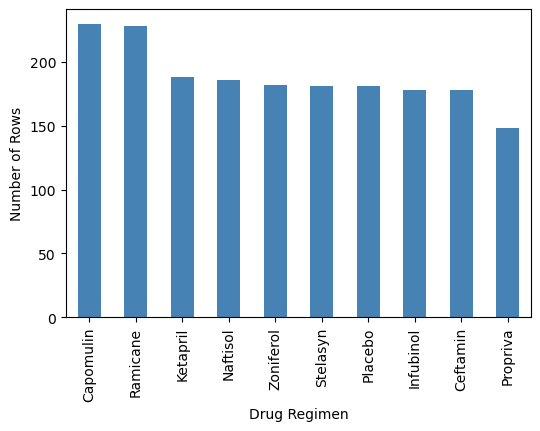

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Plot the bar chart
regimen_counts.plot(kind='bar', figsize=(6, 4), color='steelblue')

# Set the title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

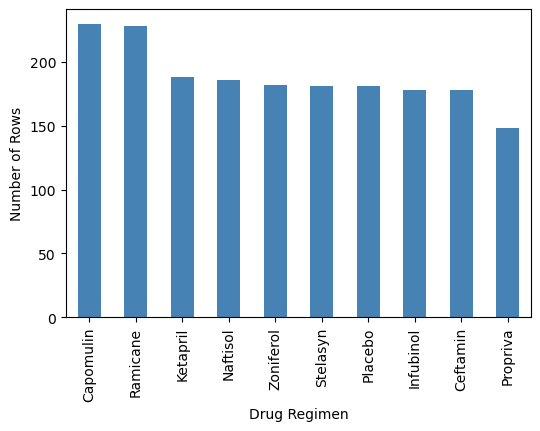

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()

plt.figure (figsize =(6,4))
regimen_counts.plot(kind='bar', color='steelblue')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.show()


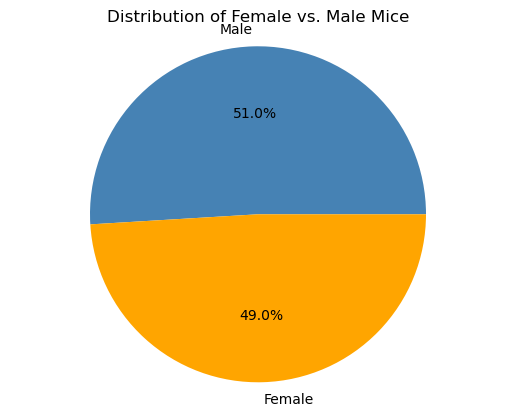

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group data by 'Sex' and count the number of mice for each sex
sex_distribution = clean_df['Sex'].value_counts()

# Plot the pie chart
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'Orange'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Add labels
plt.ylabel('')  # Remove the y-axis label

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

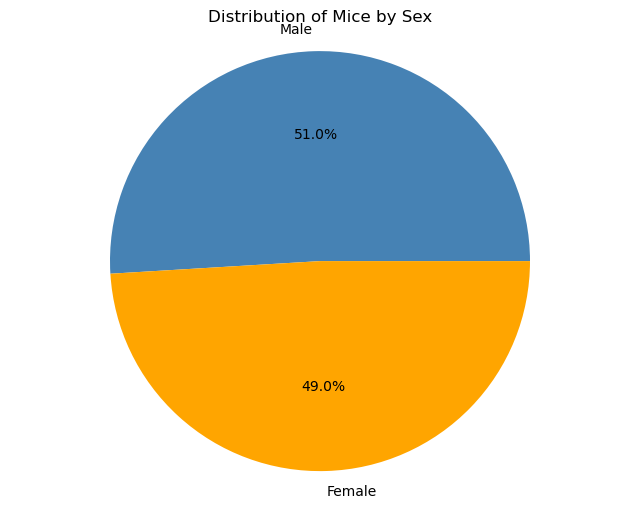

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_df['Sex'].value_counts()
plt.figure(figsize=(8, 6))  
labels = sex_distribution.index 
sizes = sex_distribution.values 
colors = ['steelblue', 'orange']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%') 
plt.title('Distribution of Mice by Sex')  # Set the title
plt.axis('equal')  
plt.show()  

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimens_df = clean_df[clean_df['Drug Regimen'].isin(four_regimens)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df,four_regimens_df, on=['Mouse ID', 'Timepoint'], how='left')
print(final_tumor_volume[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
2       a262          NaN                 NaN
3       a275     Ceftamin           62.999356
4       a366          NaN                 NaN
..       ...          ...                 ...
243     z435          NaN                 NaN
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451
246     z795          NaN                 NaN
247     z969          NaN                 NaN

[248 rows x 3 columns]


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. (this will be done in the loop for loop)
for treatment in four_regimens:
    # Locate the rows which contain mice for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(treatment_data)

    #calulating IQR
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR= Q3-Q1

    #Defining bounds 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f'"Potential Outliers:" {outliers}')
   

"Potential Outliers:" Series([], Name: Tumor Volume (mm3), dtype: float64)
"Potential Outliers:" Series([], Name: Tumor Volume (mm3), dtype: float64)
"Potential Outliers:" 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
"Potential Outliers:" Series([], Name: Tumor Volume (mm3), dtype: float64)


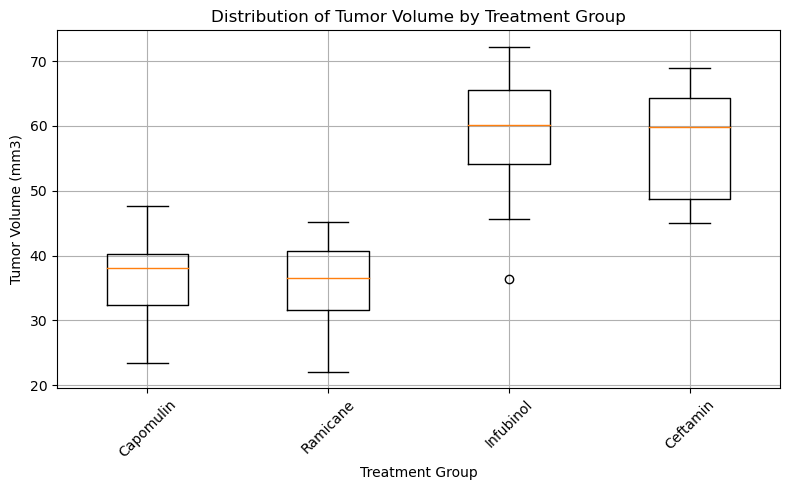

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volumes for each treatment group
tumor_volumes = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in four_regimens]

# Generate the box plot
plt.figure(figsize=(8, 5))  # Set the figure size
plt.boxplot(tumor_volumes, labels=four_regimens)  # Create the box plot
plt.title('Distribution of Tumor Volume by Treatment Group')  # Set the title
plt.xlabel('Treatment Group')  # Set the x-axis label
plt.ylabel('Tumor Volume (mm3)')  # Set the y-axis label
plt.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

## Line and Scatter Plots

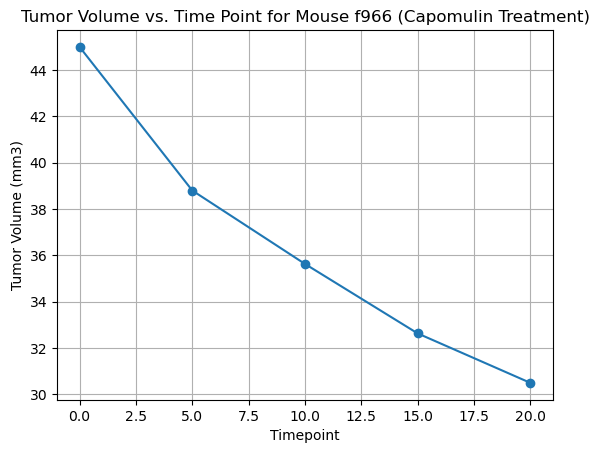

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = mouse_merge[mouse_merge['Drug Regimen'] == 'Capomulin']
mouse_id = 'f966'

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')

plt.grid(True)
plt.show()


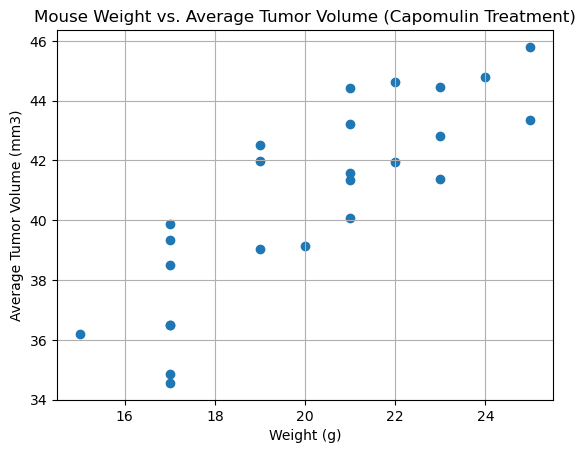

In [127]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
capomulin_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Plot mouse weight vs. average tumor volume
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')

# Display the plot
plt.grid(True)
plt.show()

## Correlation and Regression

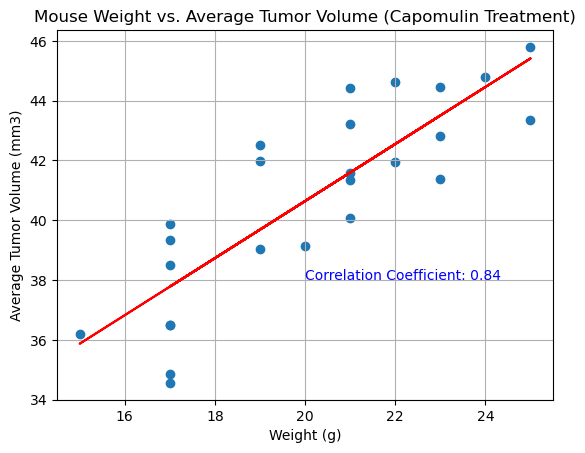

In [129]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

correlation_coefficient = capomulin_mouse_weight.corr(capomulin_avg_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)

# Plot the scatter plot
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume)

# Add the regression line to the plot
plt.plot(capomulin_mouse_weight, slope * capomulin_mouse_weight + intercept, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')

# Add correlation coefficient to the plot
plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, color='blue')

# Display the plot
plt.grid(True)
plt.show()
